In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import os
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [ ]:
len(model.layers)

22

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


In [ ]:
betw = 'Pepper'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+betw+'.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,1,149,146,163,180,177,193,163,162,178,...,157,150,165,161,156,171,160,155,170,0
2,2,176,155,164,177,156,164,177,154,162,...,162,135,144,154,127,136,156,129,138,0
3,3,161,157,169,153,149,161,156,152,164,...,154,153,165,159,157,169,172,170,182,0
4,4,130,126,137,140,136,147,147,143,154,...,188,174,181,190,176,182,193,179,185,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,4871,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4872,4872,160,157,172,160,157,172,175,175,189,...,175,168,181,176,169,182,169,162,175,0
4873,4873,185,194,203,190,199,208,182,191,200,...,116,130,149,110,124,143,113,127,146,0
4874,4874,153,149,155,151,147,153,145,141,147,...,100,98,110,107,105,117,137,135,147,0


In [ ]:
df = df.sample(frac = 1)
df = df.drop(columns = 'Unnamed: 0').reset_index()
df = df.drop(columns = 'index')

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,179,172,179,215,208,215,178,171,178,188,...,141,137,149,141,137,149,147,143,155,1
1,198,196,202,199,197,203,197,195,201,194,...,110,106,118,93,89,101,125,121,133,0
2,178,185,200,173,180,195,180,187,201,191,...,203,203,215,200,200,212,200,200,211,1
3,160,158,170,163,161,173,172,169,183,149,...,156,153,168,156,153,168,156,153,168,0
4,194,191,206,47,43,54,61,123,131,173,...,173,170,187,185,182,197,171,168,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,200,201,211,194,195,205,196,196,208,191,...,191,192,206,183,184,198,171,172,186,1
4872,116,101,109,117,102,110,108,94,100,112,...,198,191,196,198,186,192,201,189,195,1
4873,177,162,170,157,142,150,189,173,182,192,...,236,230,235,187,181,186,217,212,217,1
4874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

4876


In [ ]:
print(y)
print(x)

0       1
1       0
2       1
3       0
4       0
       ..
4871    1
4872    1
4873    1
4874    1
4875    0
Name: label, Length: 4876, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0     179  172  179  215  208  215  178  171  178  188  ...   151   141   137   
1     198  196  202  199  197  203  197  195  201  194  ...   112   110   106   
2     178  185  200  173  180  195  180  187  201  191  ...   218   203   203   
3     160  158  170  163  161  173  172  169  183  149  ...   171   156   153   
4     194  191  206   47   43   54   61  123  131  173  ...   172   173   170   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
4871  200  201  211  194  195  205  196  196  208  191  ...   196   191   192   
4872  116  101  109  117  102  110  108   94  100  112  ...   201   198   191   
4873  177  162  170  157  142  150  189  173  182  192  ...   212   236   230   
4874    0    0    0    0    0    0    0 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
46/46 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.9051

46/46 [==============================] - 7s 143ms/step - loss: 0.6507 - accuracy: 0.9051 - val_loss: 0.6843 - val_accuracy: 0.9205
Epoch 2/30
46/46 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.9115

46/46 [==============================] - 5s 102ms/step - loss: 0.6310 - accuracy: 0.9115 - val_loss: 0.6736 - val_accuracy: 0.9205
Epoch 3/30
46/46 [==============================] - ETA: 0s - loss: 0.6255 - accuracy: 0.9051

46/46 [==============================] - 5s 117ms/step - loss: 0.6255 - accuracy: 0.9051 - val_loss: 0.6649 - val_accuracy: 0.9205
Epoch 4/30
46/46 [==============================] - ETA: 0s - loss: 0.6039 - accuracy: 0.9173

46/46 [==============================] - 6s 125ms/step - loss: 0.6039 - accuracy: 0.9173 - val_loss: 0.6510 - val_accuracy: 0.9266
Epoch 5/30
46/46 [==============================] - ETA: 0s - loss: 0.5945 - accuracy: 0.9166

46/46 [==============================] - 5s 100ms/step - loss: 0.5945 - accuracy: 0.9166 - val_loss: 0.6391 - val_accuracy: 0.9297
Epoch 6/30
46/46 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.9241

46/46 [==============================] - 6s 135ms/step - loss: 0.5801 - accuracy: 0.9241 - val_loss: 0.6315 - val_accuracy: 0.9266
Epoch 7/30
46/46 [==============================] - ETA: 0s - loss: 0.5557 - accuracy: 0.9265

46/46 [==============================] - 5s 109ms/step - loss: 0.5557 - accuracy: 0.9265 - val_loss: 0.6175 - val_accuracy: 0.9266
Epoch 8/30
46/46 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.9282

46/46 [==============================] - 5s 102ms/step - loss: 0.5525 - accuracy: 0.9282 - val_loss: 0.6100 - val_accuracy: 0.9235
Epoch 9/30
46/46 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.9296

46/46 [==============================] - 7s 144ms/step - loss: 0.5350 - accuracy: 0.9296 - val_loss: 0.6014 - val_accuracy: 0.9327
Epoch 10/30
46/46 [==============================] - ETA: 0s - loss: 0.5259 - accuracy: 0.9306

46/46 [==============================] - 5s 102ms/step - loss: 0.5259 - accuracy: 0.9306 - val_loss: 0.5957 - val_accuracy: 0.9358
Epoch 11/30
46/46 [==============================] - ETA: 0s - loss: 0.5294 - accuracy: 0.9299

46/46 [==============================] - 5s 100ms/step - loss: 0.5294 - accuracy: 0.9299 - val_loss: 0.5884 - val_accuracy: 0.9327
Epoch 12/30
46/46 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.9462

46/46 [==============================] - 7s 144ms/step - loss: 0.4861 - accuracy: 0.9462 - val_loss: 0.5781 - val_accuracy: 0.9388
Epoch 13/30
46/46 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.9408

46/46 [==============================] - 5s 103ms/step - loss: 0.4873 - accuracy: 0.9408 - val_loss: 0.5686 - val_accuracy: 0.9358
Epoch 14/30
46/46 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.9381

46/46 [==============================] - 5s 117ms/step - loss: 0.4890 - accuracy: 0.9381 - val_loss: 0.5646 - val_accuracy: 0.9327
Epoch 15/30
46/46 [==============================] - ETA: 0s - loss: 0.4712 - accuracy: 0.9439

46/46 [==============================] - 6s 124ms/step - loss: 0.4712 - accuracy: 0.9439 - val_loss: 0.5553 - val_accuracy: 0.9266
Epoch 16/30
46/46 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.9479

46/46 [==============================] - 5s 103ms/step - loss: 0.4452 - accuracy: 0.9479 - val_loss: 0.5514 - val_accuracy: 0.9297
Epoch 17/30
46/46 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.9490

46/46 [==============================] - 6s 131ms/step - loss: 0.4374 - accuracy: 0.9490 - val_loss: 0.5404 - val_accuracy: 0.9327
Epoch 18/30
46/46 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.9554

46/46 [==============================] - 5s 111ms/step - loss: 0.4192 - accuracy: 0.9554 - val_loss: 0.5294 - val_accuracy: 0.9297
Epoch 19/30
46/46 [==============================] - ETA: 0s - loss: 0.4153 - accuracy: 0.9575

46/46 [==============================] - 5s 102ms/step - loss: 0.4153 - accuracy: 0.9575 - val_loss: 0.5290 - val_accuracy: 0.9358
Epoch 20/30
46/46 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.9568

46/46 [==============================] - 6s 142ms/step - loss: 0.4080 - accuracy: 0.9568 - val_loss: 0.5209 - val_accuracy: 0.9327
Epoch 21/30
46/46 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.9551

46/46 [==============================] - 5s 100ms/step - loss: 0.3950 - accuracy: 0.9551 - val_loss: 0.5162 - val_accuracy: 0.9297
Epoch 22/30
46/46 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.9541

46/46 [==============================] - 5s 98ms/step - loss: 0.3861 - accuracy: 0.9541 - val_loss: 0.5127 - val_accuracy: 0.9297
Epoch 23/30
46/46 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.9602

46/46 [==============================] - 7s 143ms/step - loss: 0.3837 - accuracy: 0.9602 - val_loss: 0.5065 - val_accuracy: 0.9297
Epoch 24/30
46/46 [==============================] - ETA: 0s - loss: 0.4191 - accuracy: 0.9483

46/46 [==============================] - 5s 100ms/step - loss: 0.4191 - accuracy: 0.9483 - val_loss: 0.4972 - val_accuracy: 0.9327
Epoch 25/30
46/46 [==============================] - ETA: 0s - loss: 0.3787 - accuracy: 0.9599

46/46 [==============================] - 5s 107ms/step - loss: 0.3787 - accuracy: 0.9599 - val_loss: 0.4933 - val_accuracy: 0.9297
Epoch 26/30
46/46 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.9629

46/46 [==============================] - 6s 135ms/step - loss: 0.3711 - accuracy: 0.9629 - val_loss: 0.4868 - val_accuracy: 0.9327
Epoch 27/30
46/46 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.9544

46/46 [==============================] - 5s 101ms/step - loss: 0.3921 - accuracy: 0.9544 - val_loss: 0.4853 - val_accuracy: 0.9266
Epoch 28/30
46/46 [==============================] - ETA: 0s - loss: 0.3605 - accuracy: 0.9612

46/46 [==============================] - 5s 116ms/step - loss: 0.3605 - accuracy: 0.9612 - val_loss: 0.4777 - val_accuracy: 0.9358
Epoch 29/30
46/46 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.9592

46/46 [==============================] - 6s 121ms/step - loss: 0.3537 - accuracy: 0.9592 - val_loss: 0.4746 - val_accuracy: 0.9327
Epoch 30/30
46/46 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.9612

46/46 [==============================] - 5s 98ms/step - loss: 0.3582 - accuracy: 0.9612 - val_loss: 0.4709 - val_accuracy: 0.9297
Duration: 0:02:40.067788


In [ ]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

101/101 [==============================] - 2s 18ms/step


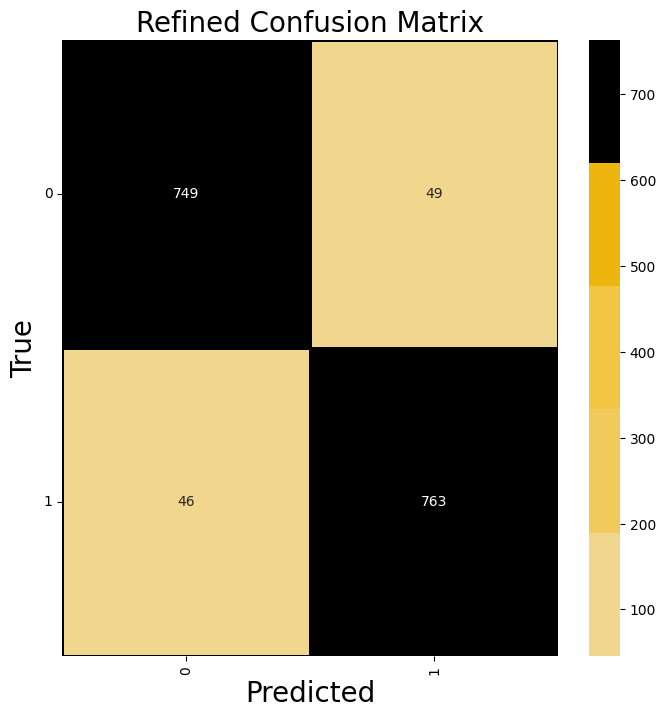

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cmap_unblended = sns.color_palette(["#f0d78d","#f0cb5b","#f2c641","#edb50e","#000000"], as_cmap=True)
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1])
cm = ConfusionM
targetnames = [0,1]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= cmap_unblended, linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

ROC AUC Score=0.940


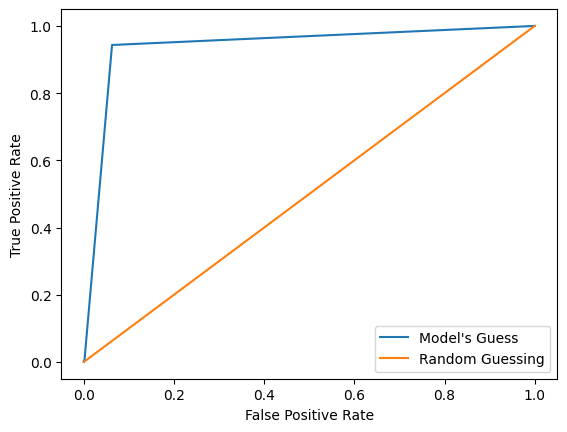

In [ ]:
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Pred_Label)
# summarize scores
print('ROC AUC Score=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Pred_Label)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, label="Model's Guess")
pyplot.plot(ns_fpr, ns_tpr, label='Random Guessing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
targetnames = [0,1]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1], target_names=tar)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       799
           1       0.94      0.94      0.94       811

   micro avg       0.94      0.94      0.94      1610
   macro avg       0.94      0.94      0.94      1610
weighted avg       0.94      0.94      0.94      1610



In [ ]:
model.save_weights('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model_weights.h5')

In [ ]:
model.save('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
